In [11]:
df = pd.read_csv('datas/siheung_2025.10.csv', encoding='euc-kr')
print(df.columns)

Index(['행정구역', '2025년10월_거주자 인구수', '2025년10월_세대수', '2025년10월_세대당 인구',
       '2025년10월_남자 인구수', '2025년10월_여자 인구수', '2025년10월_남여 비율'],
      dtype='object')


In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 1. Windows용 한글 폰트 경로 지정
font_path = "C:/Windows/Fonts/malgun.ttf"

# 2. 폰트 이름 등록
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 3. 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 시흥시 동별 인구수 (2025년 10월 기준)

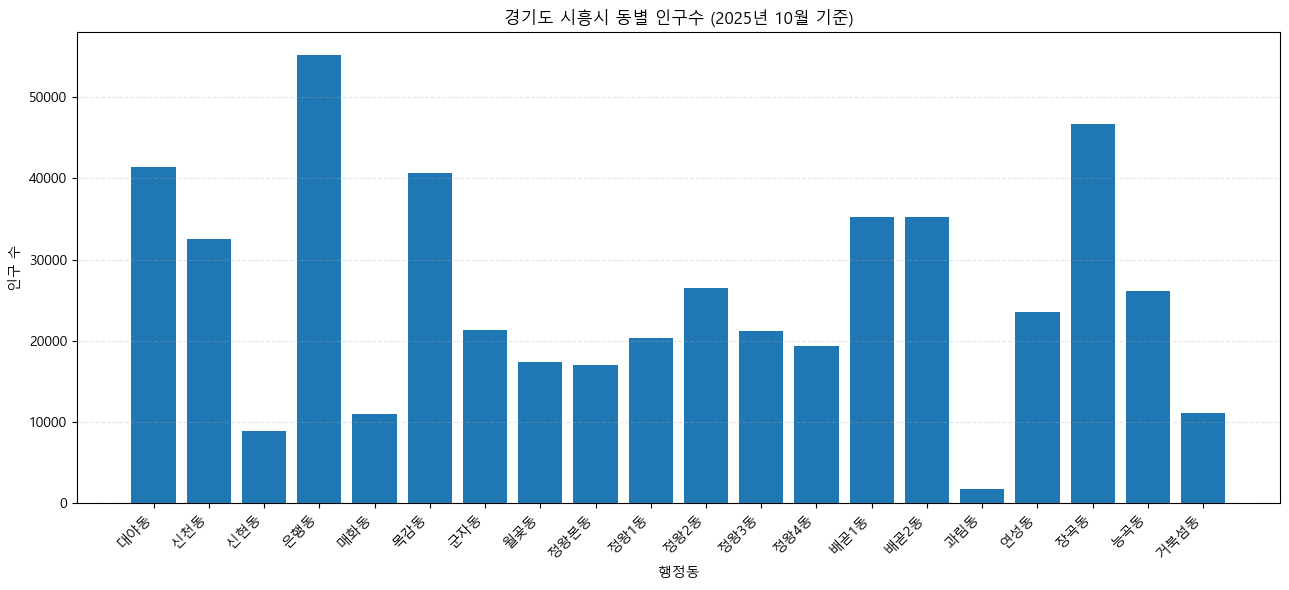

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) CSV 파일 읽기
df = pd.read_csv('datas/siheung_2025.10.csv', encoding='cp949')

# 2) 행정구역 중 '동'이 포함된 데이터만 필터링 (시흥시 전체는 제외됨)
dong_df = df[df['행정구역'].str.contains('동')].copy()

# 3) '2025년10월_거주자 인구수' → 숫자로 변환
dong_df['인구수'] = dong_df['2025년10월_거주자 인구수'].str.replace(',', '').astype(int)

# 4) 행정구역 이름 깔끔하게 정리
dong_df['동'] = (
    dong_df['행정구역']
    .str.replace('경기도 시흥시 ', '', regex=False)  # 앞에 "경기도 시흥시 " 제거
    .str.replace(r'\(\d+\)', '', regex=True)          # 뒤의 (4139051000) 같은 코드 제거
)

# 5) 시각화
plt.figure(figsize=(13, 6))
plt.bar(dong_df['동'], dong_df['인구수'])
plt.title('경기도 시흥시 동별 인구수 (2025년 10월 기준)')
plt.xlabel('행정동')
plt.ylabel('인구 수')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 시흥시 전체 남녀 인구 비율 (2025년 10월)

<>:15: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
<>:15: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25504\1439413386.py:15: SyntaxWarning: "\(" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\("? A raw string is also an option.
  total = df[df['행정구역'].str.contains('경기도 시흥시 \(')].iloc[0]


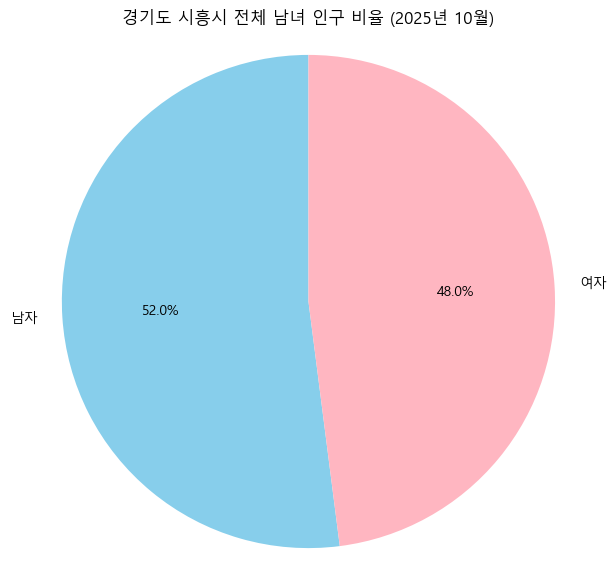

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# --- 한글 폰트 설정 ---
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# CSV 읽기
df = pd.read_csv("datas/siheung_2025.10.csv", encoding='cp949')

# 시흥시 전체 행만 선택 (행정구역에 '시흥시 (' 포함)
total = df[df['행정구역'].str.contains('경기도 시흥시 \(')].iloc[0]

# 숫자로 변환
male = int(total['2025년10월_남자 인구수'].replace(',', ''))
female = int(total['2025년10월_여자 인구수'].replace(',', ''))

# 파이차트
labels = ['남자', '여자']
sizes = [male, female]
colors = ['skyblue', 'lightpink']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90, colors=colors)
plt.title("경기도 시흥시 전체 남녀 인구 비율 (2025년 10월)")
plt.axis('equal')
plt.show()

# 모든 동의 남녀 인구 파이차트

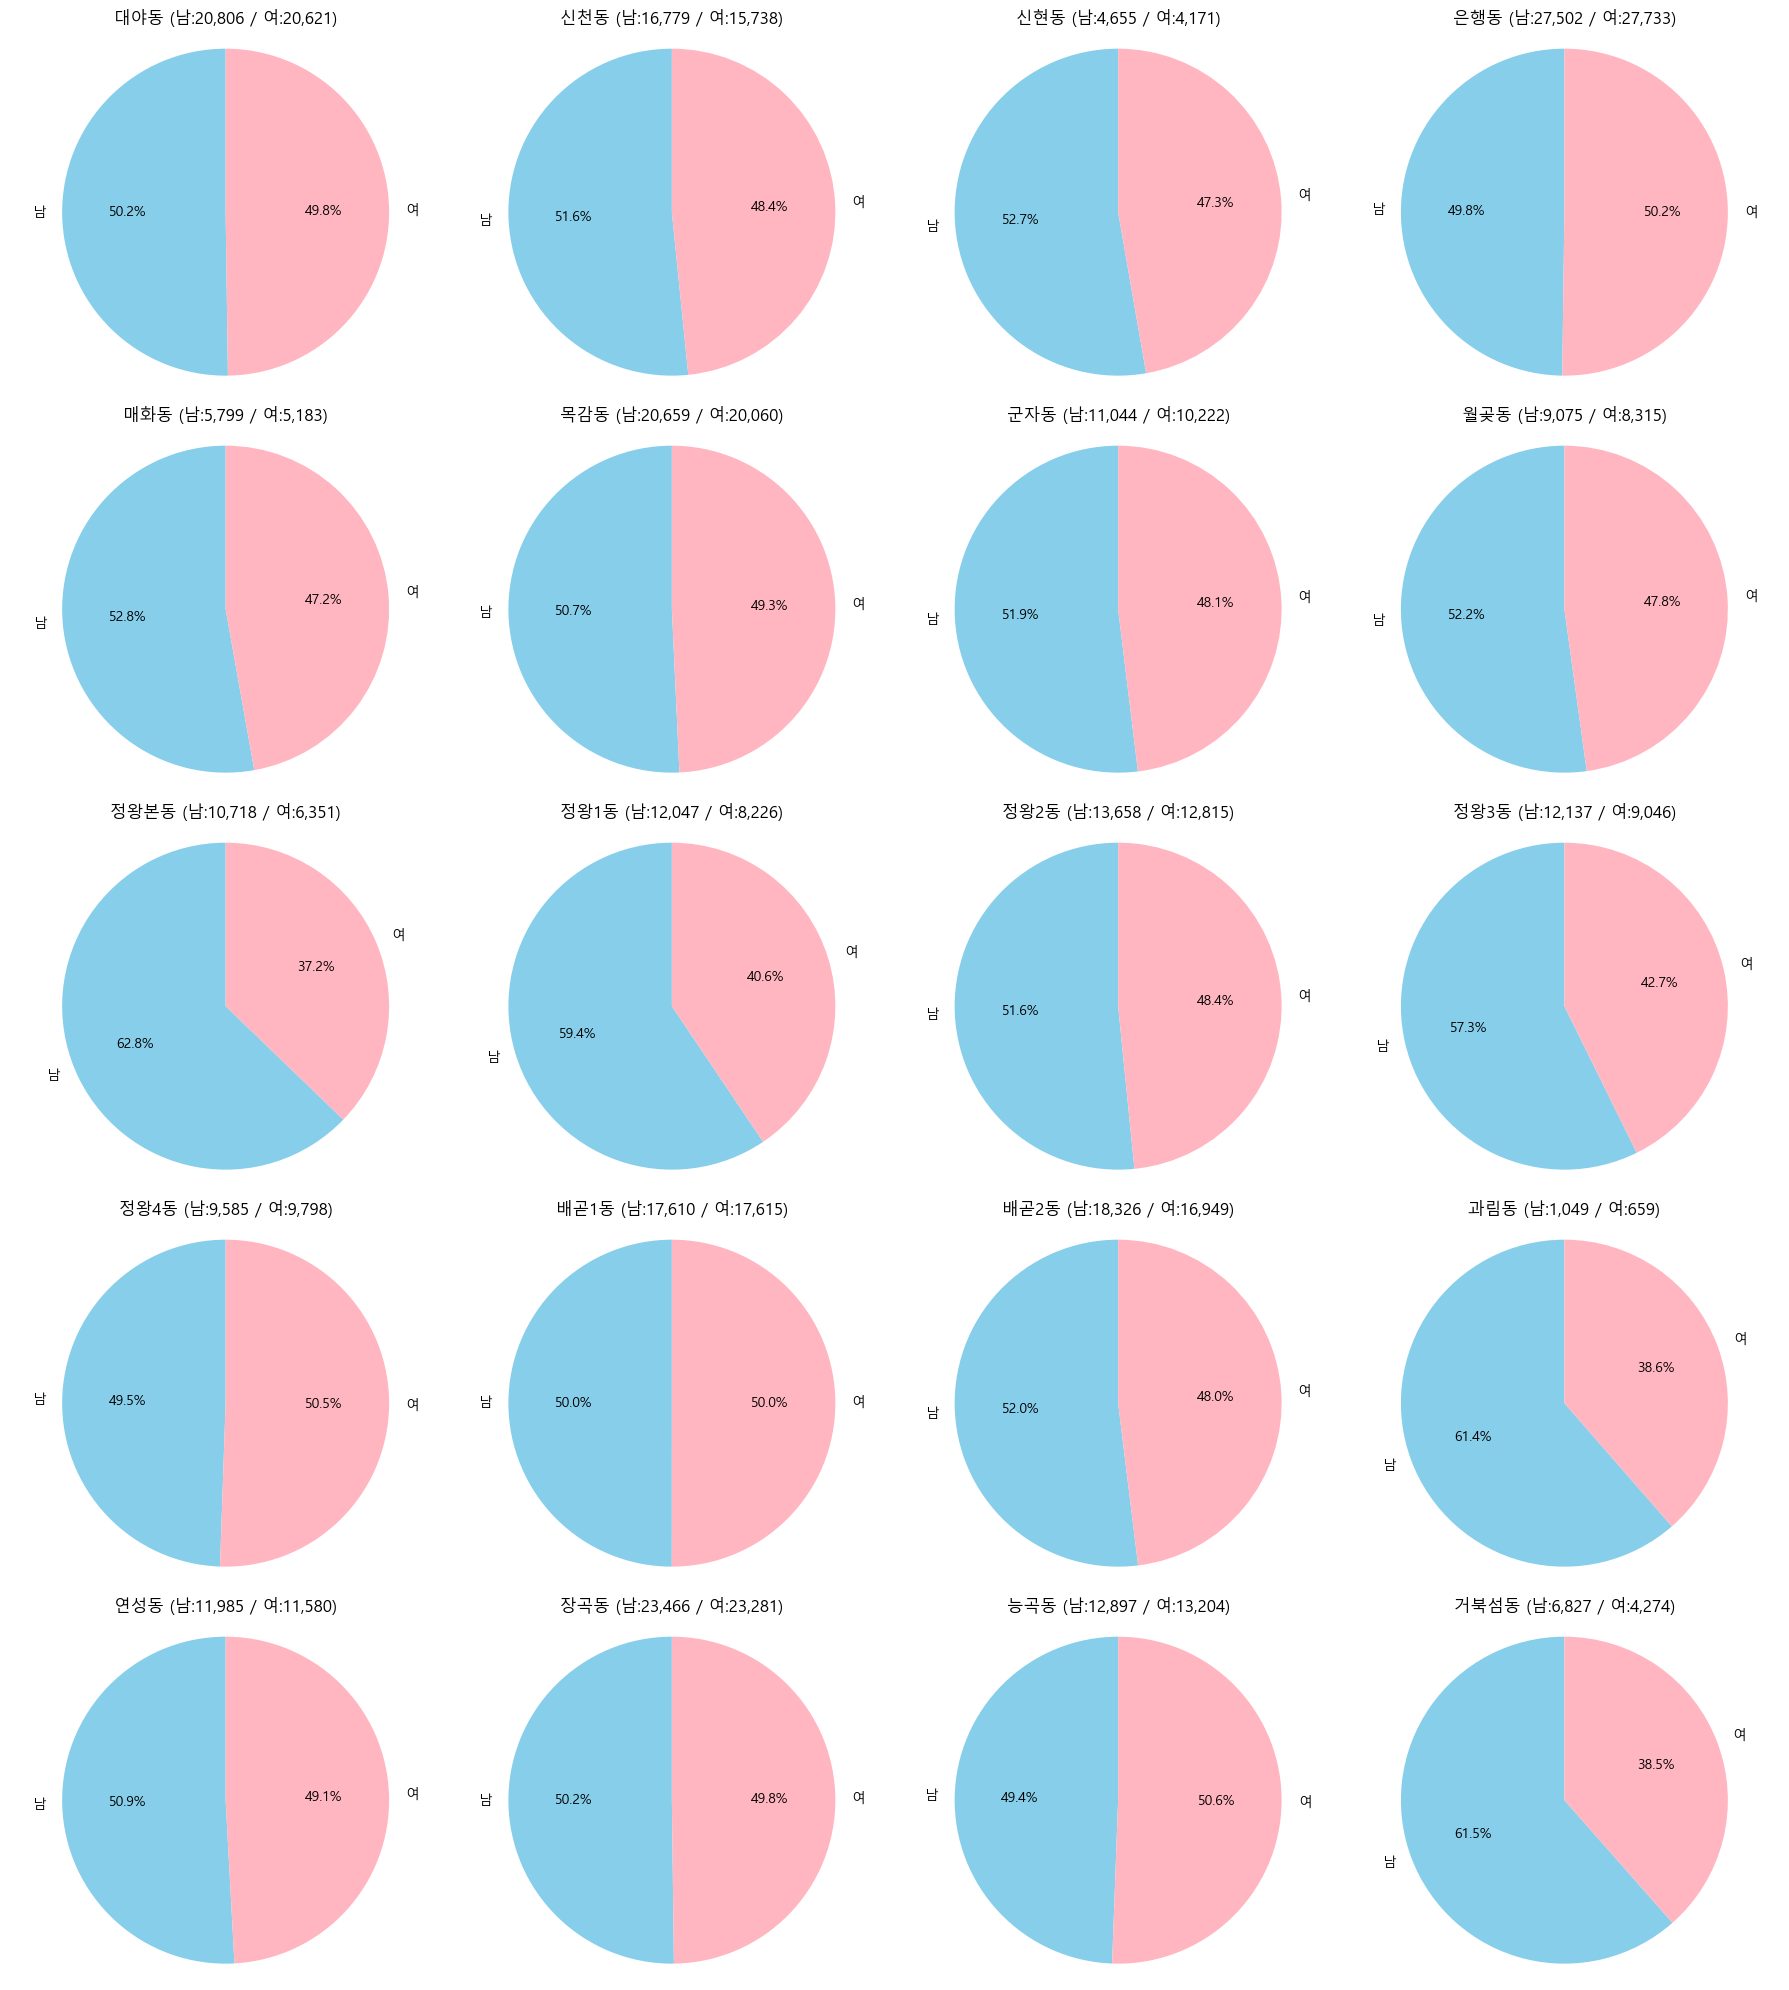

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import math

# --- 한글 폰트 설정 ---
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# CSV 읽기
df = pd.read_csv("datas/siheung_2025.10.csv", encoding='cp949')

# 동만 선택
dong_df = df[df["행정구역"].str.contains("동")].copy()

# 인구수 숫자 변환
dong_df["남"] = dong_df["2025년10월_남자 인구수"].str.replace(",", "").astype(int)
dong_df["여"] = dong_df["2025년10월_여자 인구수"].str.replace(",", "").astype(int)

# 동 이름 정리
dong_df["동"] = (
    dong_df["행정구역"]
    .str.replace("경기도 시흥시 ", "", regex=False)
    .str.replace(r"\(\d+\)", "", regex=True)
)

# 동 개수
num_dong = len(dong_df)

# subplot 그리드 크기 계산 (예: 5행 x 4열 등 자동)
cols = 4
rows = math.ceil(num_dong / cols)

plt.figure(figsize=(18, rows * 4))

# 각 동별 파이차트 생성
for i, row in dong_df.iterrows():
    idx = i - dong_df.index[0]  # 0부터 시작하도록 index 조정
    plt.subplot(rows, cols, idx + 1)
    plt.pie(
        [row["남"], row["여"]],
        labels=["남", "여"],
        autopct="%.1f%%",
        startangle=90,
        colors=["skyblue", "lightpink"]
    )
    plt.title(f"{row['동']} (남:{row['남']:,} / 여:{row['여']:,})")
    plt.axis("equal")

plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

# ----- 한글 폰트 설정 -----
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우 기준
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
# -------------------------

# 1) CSV 읽기
df = pd.read_csv('datas/siheung_2025.10.csv', encoding='cp949')

# 2) 동만 필터링
dong_df = df[df['행정구역'].str.contains('동')].copy()

# 3) 숫자형으로 변환
dong_df['총인구'] = dong_df['2025년10월_거주자 인구수'].str.replace(',', '').astype(int)
dong_df['남자'] = dong_df['2025년10월_남자 인구수'].str.replace(',', '').astype(int)
dong_df['여자'] = dong_df['2025년10월_여자 인구수'].str.replace(',', '').astype(int)
dong_df['성비'] = dong_df['2025년10월_남여 비율'].astype(float)          # 남/여 비율
dong_df['세대당인구'] = dong_df['2025년10월_세대당 인구'].astype(float)

# 4) 동 이름만 깔끔하게
dong_df['동'] = (
    dong_df['행정구역']
    .str.replace('경기도 시흥시 ', '', regex=False)
    .str.replace(r'\(\d+\)', '', regex=True)
)

# 시흥시 전체 인구 히트맵 형태로 시각화

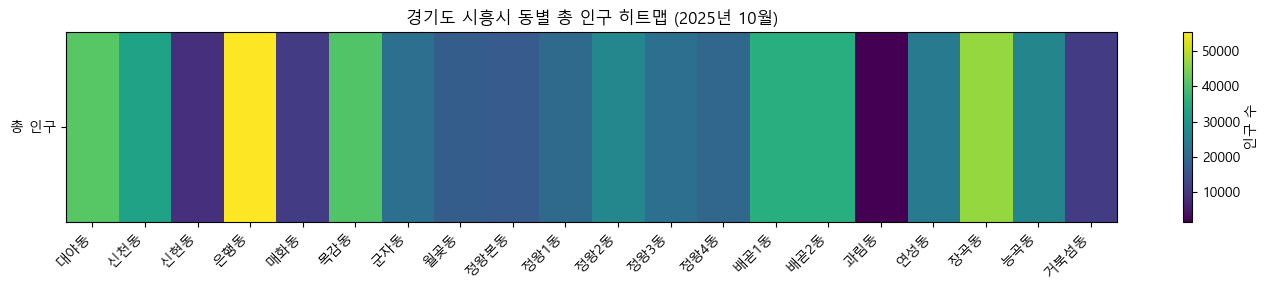

In [21]:
# ---------- 동별 총 인구 히트맵 ----------
values = dong_df['총인구'].values.reshape(1, -1)  # 1 x N 행렬

plt.figure(figsize=(14, 3))
plt.imshow(values, aspect='auto')
plt.colorbar(label='인구 수')

plt.yticks([0], ['총 인구'])
plt.xticks(range(len(dong_df)), dong_df['동'], rotation=45, ha='right')

plt.title('경기도 시흥시 동별 총 인구 히트맵 (2025년 10월)')
plt.tight_layout()
plt.show()

# 동별 성비(남여 비율) 막대그래프

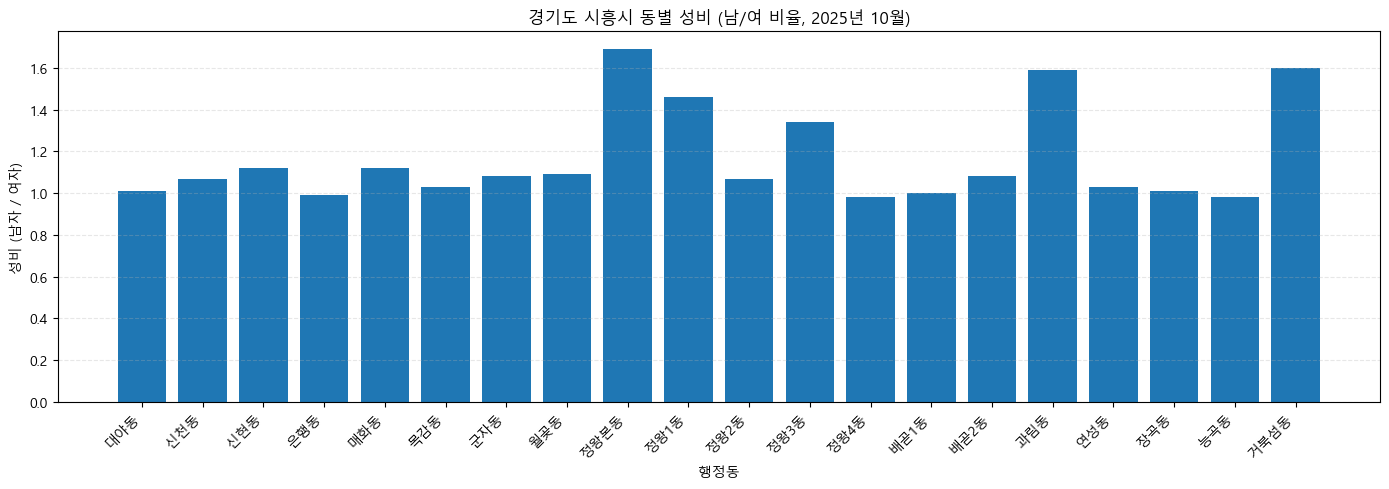

In [22]:
# ---------- 동별 성비 막대그래프 ----------
plt.figure(figsize=(14, 5))
plt.bar(dong_df['동'], dong_df['성비'])

plt.title('경기도 시흥시 동별 성비 (남/여 비율, 2025년 10월)')
plt.xlabel('행정동')
plt.ylabel('성비 (남자 / 여자)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# 행정동별 ‘세대당 인구’ 시각화

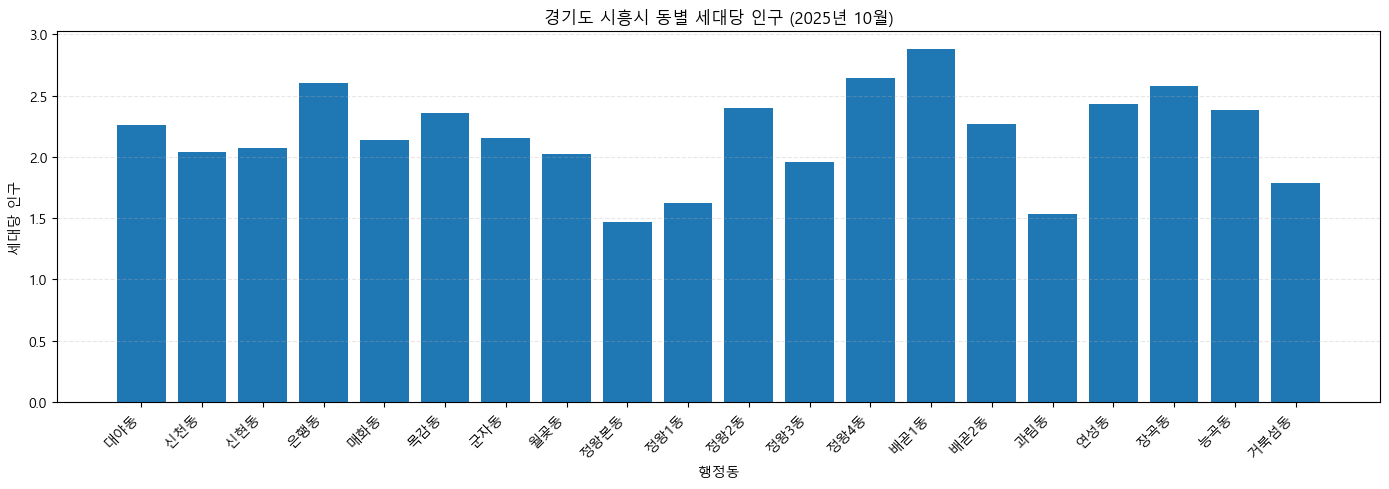

In [23]:
# ---------- 동별 세대당 인구 막대그래프 ----------
plt.figure(figsize=(14, 5))
plt.bar(dong_df['동'], dong_df['세대당인구'])

plt.title('경기도 시흥시 동별 세대당 인구 (2025년 10월)')
plt.xlabel('행정동')
plt.ylabel('세대당 인구')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc

# --- 한글 폰트 설정 ---
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우 기준
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
# -------------------------

# 파일 불러오기
var = pd.read_csv('datas/variation_siheung.csv', encoding='cp949')
age = pd.read_csv('datas/age_siheung.csv', encoding='cp949')

# 행정동만 필터링
var_dong = var[var['행정구역'].str.contains('동')].copy()
age_dong = age[age['행정구역'].str.contains('동')].copy()

# 동 이름 정리
var_dong['동'] = (var_dong['행정구역']
    .str.replace('경기도 시흥시 ', '', regex=False)
    .str.replace(r'\(\d+\)', '', regex=True)
)

age_dong['동'] = (age_dong['행정구역']
    .str.replace('경기도 시흥시 ', '', regex=False)
    .str.replace(r'\(\d+\)', '', regex=True)
)

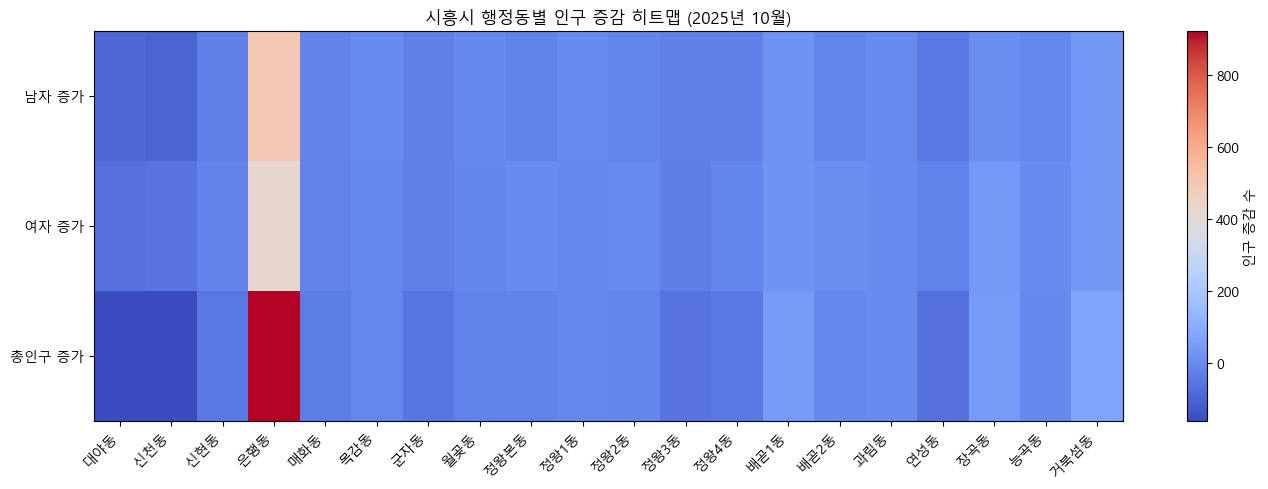

In [26]:
# 숫자로 변환
for col in [
    '2025년10월_인구증감_남자인구수', 
    '2025년10월_인구증감_여자인구수', 
    '2025년10월_인구증감_계'
]:
    var_dong[col] = var_dong[col].astype(int)

# 히트맵 행렬 생성
heatmap_data = var_dong[['2025년10월_인구증감_남자인구수',
                         '2025년10월_인구증감_여자인구수',
                         '2025년10월_인구증감_계']].T

plt.figure(figsize=(14, 5))
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto')
plt.colorbar(label='인구 증감 수')

plt.yticks(range(3), ['남자 증가', '여자 증가', '총인구 증가'])
plt.xticks(range(len(var_dong)), var_dong['동'], rotation=45, ha='right')

plt.title('시흥시 행정동별 인구 증감 히트맵 (2025년 10월)')
plt.tight_layout()
plt.show()

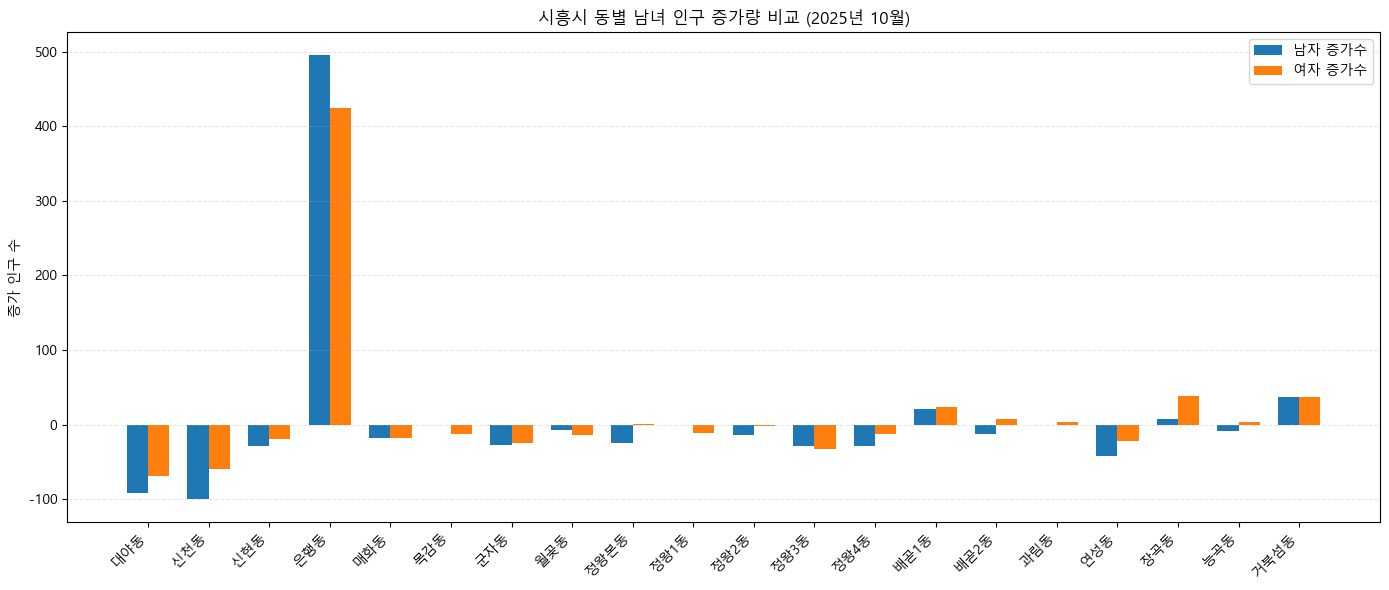

In [27]:
plt.figure(figsize=(14, 6))

x = np.arange(len(var_dong))
width = 0.35

plt.bar(x - width/2, var_dong['2025년10월_인구증감_남자인구수'],
        width, label='남자 증가수')
plt.bar(x + width/2, var_dong['2025년10월_인구증감_여자인구수'],
        width, label='여자 증가수')

plt.xticks(x, var_dong['동'], rotation=45, ha='right')
plt.ylabel('증가 인구 수')
plt.title('시흥시 동별 남녀 인구 증가량 비교 (2025년 10월)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# --- 한글 폰트 설정 ---
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 파일 읽기
age = pd.read_csv('datas/age_siheung.csv', encoding='cp949')

# ✔ "시흥시 전체" 1줄만 가져오기 (중요!)
siheung_total = age[age['행정구역'].str.contains('시흥시 \\(4139000000\\)')].iloc[0]

# 남/여 연령대 컬럼 자동 찾기
male_cols = [c for c in age.columns if '남_' in c]
female_cols = [c for c in age.columns if '여_' in c]

# 숫자형 변환
male_values = siheung_total[male_cols].str.replace(',', '').astype(int).values
female_values = siheung_total[female_cols].str.replace(',', '').astype(int).values

# 연령대 이름 정리
ages = [c.replace('2025년10월_남_', '') for c in male_cols]

# 피라미드용 값 준비
male_plot = -male_values   # 왼쪽
female_plot = female_values  # 오른쪽

plt.figure(figsize=(10, 8))
plt.barh(ages, male_plot, color='skyblue', label='남자')
plt.barh(ages, female_plot, color='lightpink', label='여자')

plt.title("시흥시 전체 연령대 인구 피라미드 (2025년 10월)")
plt.xlabel("인구 수")
plt.legend()

# x축 절대값으로 표시
ticks = plt.xticks()[0]
plt.xticks(ticks, [abs(int(t)) for t in ticks])

plt.tight_layout()
plt.show()

IndexError: single positional indexer is out-of-bounds